# Data Science: visualizacao de dados para saude e medicina 
### Este curso é a parte 2 do curso anterior: '11-Data-Science-analises-para-saude-e-medicina'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

# fatiamento do dataframe até '8/4/21' (último dia que foi atualizado)
confirmed = confirmed.loc[:, :'8/4/21']
deaths = deaths.loc[:, :'8/4/21']
recovered = recovered.loc[:, :'8/4/21']

display(recovered.head(2))
display(deaths.head(2))
display(confirmed.head(2))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310


In [3]:
# ultimo dia (dia que o professor estava gravando a aula)
last_date = '3/3/20'

# criando coluna "is_china" 
is_china = confirmed['Country/Region'] == 'China'
confirmed['is_china'] = is_china

# Agrupando por 'is_china'
china_or_not_groupby = confirmed.groupby('is_china').sum(numeric_only=True)[last_date]
china_or_not_groupby

is_china
False    12733
True     80261
Name: 3/3/20, dtype: int64

<Axes: xlabel='is_china'>

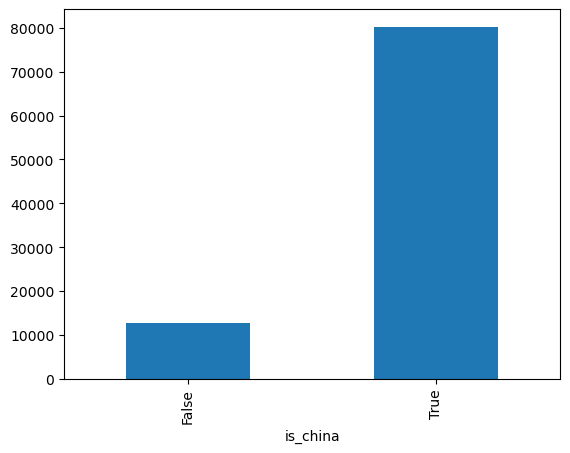

In [4]:
china_or_not_groupby.plot(kind='bar')

## No dia 02/03/2020 mainland china tinha 8 vezes o número de casos que o resto.

Mas olhar uma fotografia é muito limitado, queremos ver também como anda esse crescimento.

É até injusto pois estamos resumindo as informações e com isso, perdendo elas.

In [5]:
# Transformando True e False em strings no DataFrame

confirmed['is_china_label'] = np.where(confirmed.is_china, 'China', 'Others')
confirmed.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,is_china,is_china_label
23,NaN,Belarus,53.709800,27.953400,0,0,0,0,0,0,...,442831,443864,445048,446040,446998,447754,448335,449302,False,Others
248,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,25930,25942,25954,25963,25983,26005,26026,26044,False,Others
118,NaN,Fiji,-17.713400,178.065000,0,0,0,0,0,0,...,26196,27497,28660,29781,30413,31513,32733,33920,False,Others
277,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,2473,2479,2481,2484,2486,2486,2486,2486,False,Others
215,NaN,Peru,-9.190000,-75.015200,0,0,0,0,0,0,...,2107873,2108595,2108595,2111393,2113201,2114445,2116652,2119068,False,Others


<Axes: xlabel='is_china_label'>

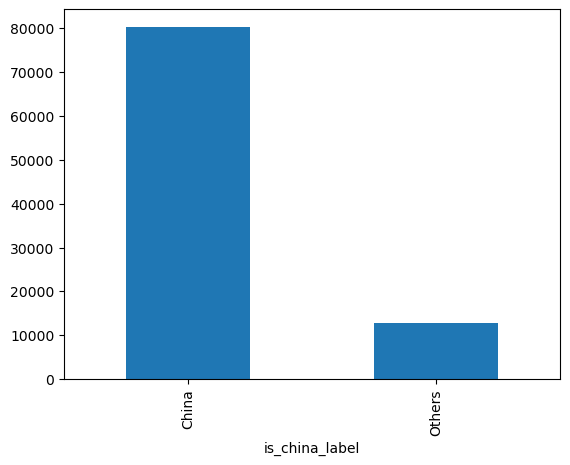

In [6]:
china_or_not_groupby = confirmed.groupby('is_china_label').sum(numeric_only=True)[last_date]
china_or_not_groupby.plot(kind='bar')

In [7]:
# Função de busca ao dia anterior ao 'last_date'

def day_before_last_date(last_date):
    from datetime import datetime, timedelta
    date_format = "%m/%d/%y"
    date = datetime.strptime(last_date, date_format)
    day_before_date = date - timedelta(days=1)
    day_before_last_date_str = "{}/{}/{}".format(day_before_date.month, day_before_date.day, day_before_date.year % 100)
    return day_before_last_date_str

# dia anterior
day_before_last_date = day_before_last_date(last_date)

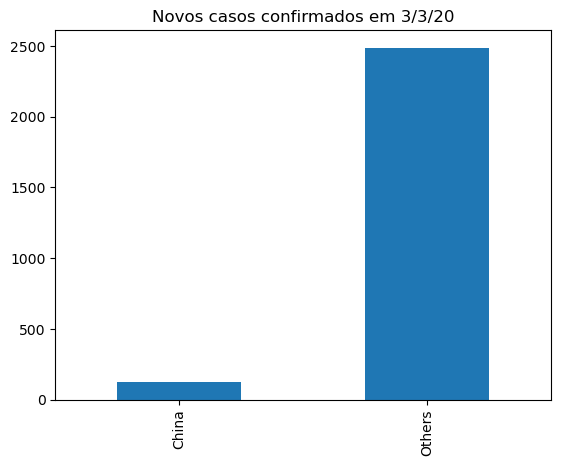

In [8]:
# Crescimento

china_or_not_groupby = confirmed.groupby('is_china_label').sum(numeric_only=True).loc[:, : last_date]
# coluna crescimento
china_or_not_groupby['delta'] = china_or_not_groupby[last_date] - china_or_not_groupby[day_before_last_date]

# Plot
china_or_not_groupby['delta'].plot(kind='bar')
plt.title(f'Novos casos confirmados em {last_date}')
plt.xlabel('')
plt.show()

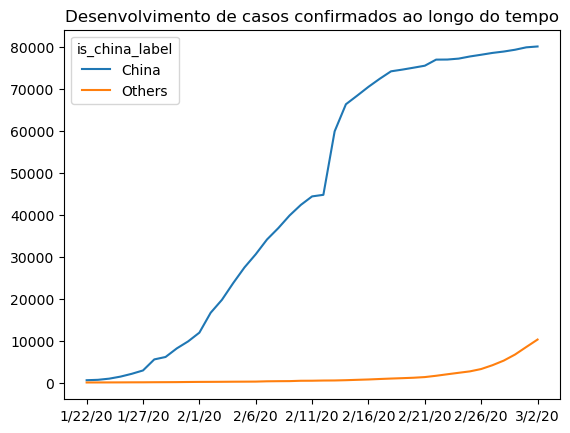

In [9]:
# Transpose para plotar melhor
T_china_or_not_groupby = china_or_not_groupby.T[2:-2]

# Plot Desenvolvimento de casos China vs outros
T_china_or_not_groupby.plot()
plt.title('Desenvolvimento de casos confirmados ao longo do tempo')
plt.show()

In [10]:
# Aumento de casos por dia

In [11]:
# diff
T_china_or_not_groupby.diff().head(3)

is_china_label,China,Others
1/22/20,NaN,NaN
1/23/20,95.0,5.0
1/24/20,277.0,10.0


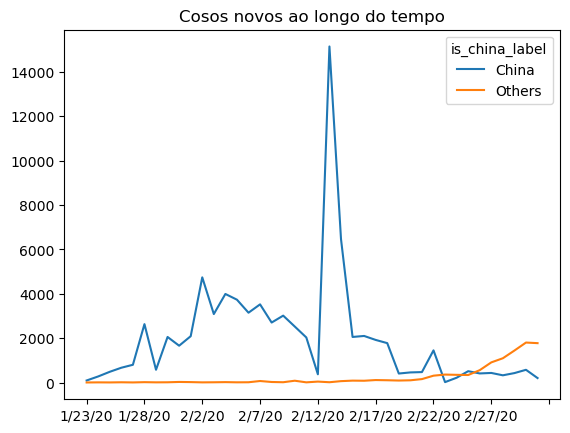

In [12]:
# plot
differences = T_china_or_not_groupby.diff().dropna()
differences.plot()
plt.title('Cosos novos ao longo do tempo')
plt.show()

## Taxa de Incidencia

In [13]:
# Juntando dados

def latest_by_country_at(data, date):
    return data.groupby('Country/Region').sum(numeric_only=True)[date]

all_datas = [latest_by_country_at(confirmed, last_date), 
             latest_by_country_at(deaths, last_date), 
             latest_by_country_at(recovered, last_date)]

combined = pd.concat(all_datas, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']

# letalidade 1 (deaths / confirmed)
letality_rate_1 = combined.deaths / combined.confirmed

# letalidade 2 (deaths / (deaths + recovered))
letality_rate_2 = combined.deaths / (combined.deaths + combined.recovered)

# adicionando ao DataFrame
combined['letality_rate_1'] = letality_rate_1 * 100
combined['letality_rate_2'] = letality_rate_2 * 100

combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,5,0,0,0.0,NaN
Albania,0,0,0,NaN,NaN
Algeria,5,0,0,0.0,NaN
Andorra,1,0,0,0.0,NaN
Angola,0,0,0,NaN,NaN


In [14]:
cases_china = china_or_not_groupby[last_date].loc['China']
cases_china

80261

In [15]:
estimated_china_population = 1437525528

In [16]:
incidende_ratio = (cases_china / estimated_china_population) * 100000
incidende_ratio

5.583274761851742

In [17]:
un_population = pd.read_csv("https://raw.githubusercontent.com/IgorNascAlves/data-science-primeiros-passos/master/WPP2019_TotalPopulationBySex.csv")
# totais estão em milhares, valor real:
un_population['PopTotal'] *= 1000
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [18]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [19]:
pop_total_by_location_2019 = un_population.query('Time==2019')[['Location', 'PopTotal']].set_index('Location')
pop_total_by_location_2019.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [20]:
# join DF de casos e DF de populações
pop_total_by_location_and_combined = combined.join(pop_total_by_location_2019)
pop_total_by_location_and_combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,5,0,0,0.0,NaN,38041757.0
Albania,0,0,0,NaN,NaN,2880913.0
Algeria,5,0,0,0.0,NaN,43053054.0
Andorra,1,0,0,0.0,NaN,77146.0
Angola,0,0,0,NaN,NaN,31825299.0


In [21]:
# top 20 com mais casos
pop_total_by_location_and_combined.sort_values('confirmed', ascending=False).head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
China,80261,2947,47450,3.671771,5.847570,1.433784e+09
"Korea, South",5186,28,30,0.539915,48.275862,NaN
Italy,2502,79,160,3.157474,33.054393,6.055009e+07
Iran,2336,77,291,3.296233,20.923913,NaN
Diamond Princess,706,6,10,0.849858,37.500000,NaN
Japan,298,6,43,2.013423,12.244898,1.268603e+08
France,212,4,12,1.886792,25.000000,6.512973e+07
United Kingdom,189,4,8,2.116402,33.333333,6.753016e+07
Germany,188,0,16,0.000000,0.000000,8.351705e+07
Spain,165,1,2,0.606061,33.333333,4.673678e+07


In [22]:
# Observamos que alguns nomes não são iguais na duas tabelas, por isso alguns joins deram errado

errados = ['Korea, South', 'Iran', 'US']

In [23]:
# Procurando Korea do Sul do DataFrame
pop_total_by_location_2019.query('Location.str.contains("Korea")')

,PopTotal
Location,
Dem. People's Republic of Korea,25666158.0
Republic of Korea,51225321.0


In [24]:
# Função de busca nomes de países

def locate(population, country):
    return population.query(f'Location.str.contains("{country}")')

display(locate(pop_total_by_location_2019, 'Korea'))
display(locate(pop_total_by_location_2019, 'Iran'))
display(locate(pop_total_by_location_2019, 'United States'))

,PopTotal
Location,
Dem. People's Republic of Korea,25666158.0
Republic of Korea,51225321.0


,PopTotal
Location,
Iran (Islamic Republic of),82913893.0


,PopTotal
Location,
United States Virgin Islands,104579.0
United States of America,329064917.0
United States of America (and dependencies),332382720.0


In [25]:
# função para alterar nomes, e deixar o mesmo em ambas tabelas
def rename_location(location):
    if location=='Republic of Korea':
        return 'Korea, South'
    elif location=='Iran (Islamic Republic of)':
        return 'Iran'
    elif location=='United States of America':
        return 'US'
    else:
        return location

# map() mapeia a lista renomeando com a função passada
# pop_total_by_location_2019.index.map(rename_location_china)

# adicionando ao df
pop_total_by_location_2019['location_for_who'] = pop_total_by_location_2019.index.map(rename_location)

# visualizando
pop_total_by_location_2019[pop_total_by_location_2019['location_for_who'].isin(errados)]

,PopTotal,location_for_who
Location,,
Iran (Islamic Republic of),82913893.0,Iran
Republic of Korea,51225321.0,"Korea, South"
United States of America,329064917.0,US


In [26]:
combined_expanded = combined.merge(pop_total_by_location_2019, 
                                   left_on='Country/Region', 
                                   right_on='location_for_who').sort_values('confirmed', ascending=False).dropna()

# set_index
combined_expanded = combined_expanded.set_index('location_for_who')
combined_expanded.index.name = None  # remove nome da coluna de índice

combined_expanded.head(11)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
China,80261,2947,47450,3.671771,5.847570,1.433784e+09
"Korea, South",5186,28,30,0.539915,48.275862,5.122532e+07
Italy,2502,79,160,3.157474,33.054393,6.055009e+07
Iran,2336,77,291,3.296233,20.923913,8.291389e+07
Japan,298,6,43,2.013423,12.244898,1.268603e+08
France,212,4,12,1.886792,25.000000,6.512973e+07
United Kingdom,189,4,8,2.116402,33.333333,6.753016e+07
Germany,188,0,16,0.000000,0.000000,8.351705e+07
Spain,165,1,2,0.606061,33.333333,4.673678e+07
Singapore,110,0,78,0.000000,0.000000,5.804343e+06


## Taxa de incidência e de mortalidade

In [27]:
# taxa de incidência por padrão é calculada por 100 mil habitantes
combined_expanded['incidence_ratio'] = (combined_expanded.confirmed / combined_expanded.PopTotal) * 100000
combined_expanded.head(11)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio
China,80261,2947,47450,3.671771,5.847570,1.433784e+09,5.597846
"Korea, South",5186,28,30,0.539915,48.275862,5.122532e+07,10.123899
Italy,2502,79,160,3.157474,33.054393,6.055009e+07,4.132116
Iran,2336,77,291,3.296233,20.923913,8.291389e+07,2.817381
Japan,298,6,43,2.013423,12.244898,1.268603e+08,0.234904
France,212,4,12,1.886792,25.000000,6.512973e+07,0.325504
United Kingdom,189,4,8,2.116402,33.333333,6.753016e+07,0.279875
Germany,188,0,16,0.000000,0.000000,8.351705e+07,0.225104
Spain,165,1,2,0.606061,33.333333,4.673678e+07,0.353041
Singapore,110,0,78,0.000000,0.000000,5.804343e+06,1.895133


In [28]:
# taxa de mortalidade por padrão é calculada por 100 mil habitantes
combined_expanded['mortality_rate'] = (combined_expanded.deaths / combined_expanded.PopTotal) * 100000
combined_expanded.head(11)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidence_ratio,mortality_rate
China,80261,2947,47450,3.671771,5.847570,1.433784e+09,5.597846,0.205540
"Korea, South",5186,28,30,0.539915,48.275862,5.122532e+07,10.123899,0.054660
Italy,2502,79,160,3.157474,33.054393,6.055009e+07,4.132116,0.130470
Iran,2336,77,291,3.296233,20.923913,8.291389e+07,2.817381,0.092867
Japan,298,6,43,2.013423,12.244898,1.268603e+08,0.234904,0.004730
France,212,4,12,1.886792,25.000000,6.512973e+07,0.325504,0.006142
United Kingdom,189,4,8,2.116402,33.333333,6.753016e+07,0.279875,0.005923
Germany,188,0,16,0.000000,0.000000,8.351705e+07,0.225104,0.000000
Spain,165,1,2,0.606061,33.333333,4.673678e+07,0.353041,0.002140
Singapore,110,0,78,0.000000,0.000000,5.804343e+06,1.895133,0.000000


In [29]:
# O cálculo de incidencia acima está errado, pois assumi que a população em risco da China é todo mundo
# mas nessa data 83% dos casos estão em Hubei
# Durante esse momento da epidemia é injusto com a localização (China) considerar essa incidência.

In [38]:
# dados de Hubei, China
hubei_confirmed_cases = confirmed[confirmed['Province/State'] == 'Hubei'][last_date].values[-1]
hubei_deaths_cases = deaths[deaths['Province/State'] == 'Hubei'][last_date].values[-1]
hubei_recovered_cases = recovered[recovered['Province/State'] == 'Hubei'][last_date].values[-1]
hubei_population = 59020000

hubei_letality_rate_1 = hubei_deaths_cases / hubei_confirmed_cases
hubei_letality_rate_2 = hubei_deaths_cases / (hubei_deaths_cases + hubei_recovered_cases)

print(f'{hubei_letality_rate_1:.4f}%, {hubei_letality_rate_2:.4f}%')

0.0422%, 0.0726%
